<a href="https://colab.research.google.com/github/DipChow/datasciencefundamentals/blob/main/statistical_techniques/dimension_reduction/dimension_reduction_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini-Project: Dimension Reduction using PCA and t-SNE

## Scenario
As part of a biannual industry review, the employer wants to determine whether the selling price of automobiles is correlated with their specifications.

The data set **automobiles.csv** containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. Feature engineering must be applied to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.

## Objective
Apply dimension reduction with PCA and t-SNE to make predictions in a real-world context.

## Steps
1. Import the relevant libraries for dimension reduction.
2. Normalise the data.
3. Transform and visualise the data with PCA and t-SNE.
4. Visualise the perplexity of the data.
5. Combine PCA and t-SNE and create a final visualisation.


In [ ]:
# Step 1: Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import mutual_info_regression

# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"



In [ ]:
df = pd.read_csv(url)

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
'''
X = df.drop('price', axis=1)
y = df['price']

X.shape
'''

#1. Feature Scaling

#Make X and y, but also need to drop columns of strings
X = df.select_dtypes(include=[np.number]).drop(columns=['price'])
y = df['price']

# Create bins for the price
num_bins = 6
df['price_bin'] = pd.cut(df['price'], bins=num_bins, labels=False)

# Display the price bins
print(df[['price', 'price_bin']].head())

# Standardize the data
scaler = StandardScaler()
X_normalised = scaler.fit_transform(X)

X_normalised

     price  price_bin
0  13495.0          1
1  16500.0          1
2  16500.0          1
3  13950.0          1
4  17450.0          1


array([[-1.72362229,  1.74347043, -1.6907718 , ..., -0.64655303,
        -0.54605874,  0.24584191],
       [-1.70672403,  1.74347043, -1.6907718 , ..., -0.64655303,
        -0.54605874,  0.24584191],
       [-1.68982577,  0.133509  , -0.70859588, ..., -0.95301169,
        -0.69162706,  0.24584191],
       ...,
       [ 1.68982577, -1.47645244,  1.72187336, ..., -1.10624102,
        -1.12833203,  1.27436421],
       [ 1.70672403, -1.47645244,  1.72187336, ...,  0.11959362,
        -0.54605874,  1.27436421],
       [ 1.72362229, -1.47645244,  1.72187336, ..., -0.95301169,
        -0.83719538,  1.27436421]])

In [ ]:
# Display the price bins
print(df[['price', 'price_bin']].head())


     price  price_bin
0  13495.0          1
1  16500.0          1
2  16500.0          1
3  13950.0          1
4  17450.0          1


In [ ]:
y.describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


In [ ]:
#to see as a df
X_normalised_df = pd.DataFrame(X_normalised, columns=X.columns)
X_normalised_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_bin
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.245842
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.245842
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.245842
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.245842
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.760103


In [ ]:
#2. Apply PCA
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalised)

# Compare the shape of the normalised and PCA data.
print("Normalised data: ", X_normalised.shape)
print("PCA data for visualisation: ", X_pca.shape)

Normalised data:  (205, 16)
PCA data for visualisation:  (205, 2)


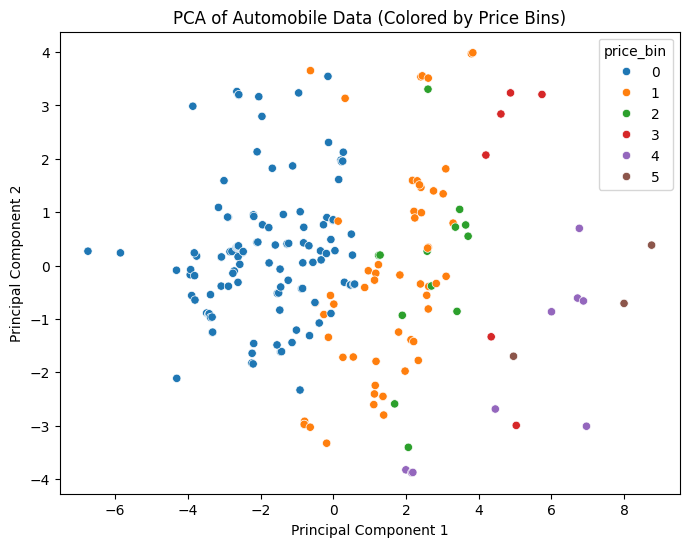

In [ ]:
# plot PCA data using discrete colors in legend using the bins in y

import matplotlib.pyplot as plt
# Plot the PCA data with discrete colors
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['price_bin'], palette='tab10', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Automobile Data (Colored by Price Bins)')
plt.show()


In [ ]:
#Transform the data with t-SNE
TSNE_model = TSNE(n_components=2, perplexity=30.0)
TSNE_transformed_data = TSNE_model.fit_transform(X_normalised)

# View the shape and data type.
print("TSNE transformed data shape:", TSNE_transformed_data.shape)
print("TSNE transformed data type:", type(TSNE_transformed_data))

TSNE transformed data shape: (205, 2)
TSNE transformed data type: <class 'numpy.ndarray'>


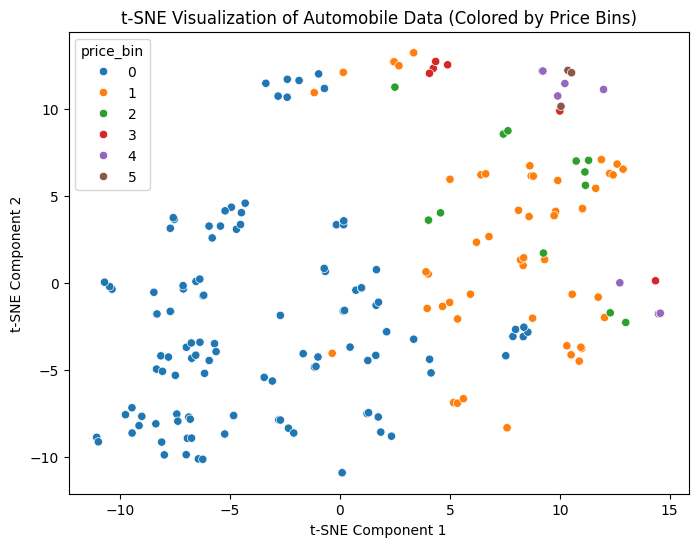

In [ ]:
# visualise output as below but using color bins

import matplotlib.pyplot as plt
# Plot the t-SNE transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=TSNE_transformed_data[:, 0], y=TSNE_transformed_data[:, 1], hue=df['price_bin'], palette='tab10', legend='full')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Automobile Data (Colored by Price Bins)')
plt.show()


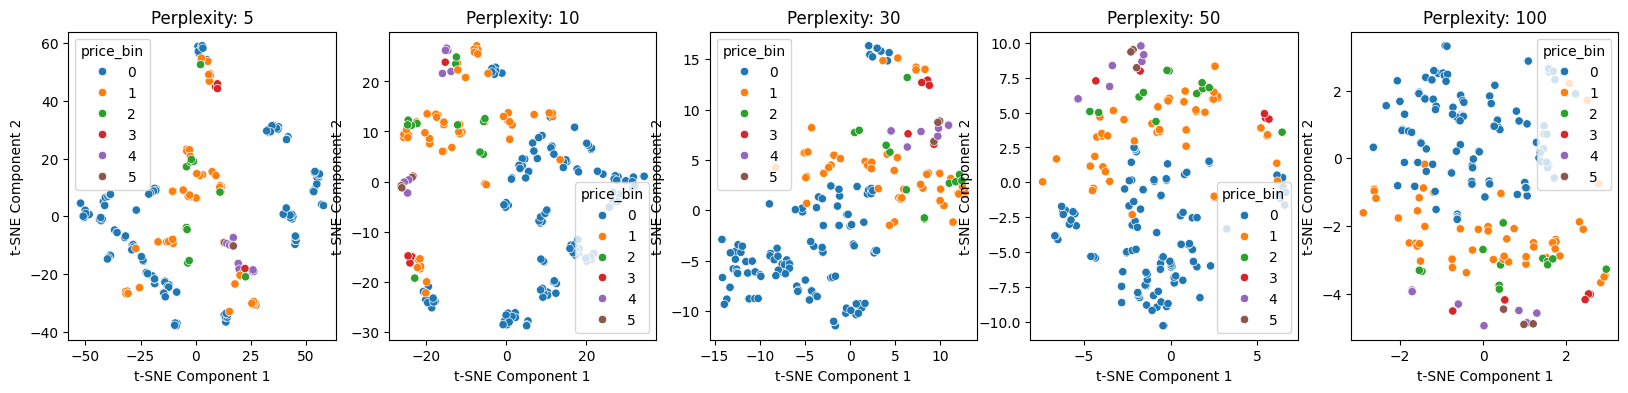

In [ ]:


import matplotlib.pyplot as plt
# Experiment with different perplexity values
perplexities = [5, 10, 30, 50, 100]

fig, axes = plt.subplots(1, len(perplexities), figsize=(20, 4))

for i, perplexity in enumerate(perplexities):
    tsne_model = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_data = tsne_model.fit_transform(X_normalised)

    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=df['price_bin'], palette='tab10', legend='full', ax=axes[i])
    axes[i].set_title(f'Perplexity: {perplexity}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

plt.show()


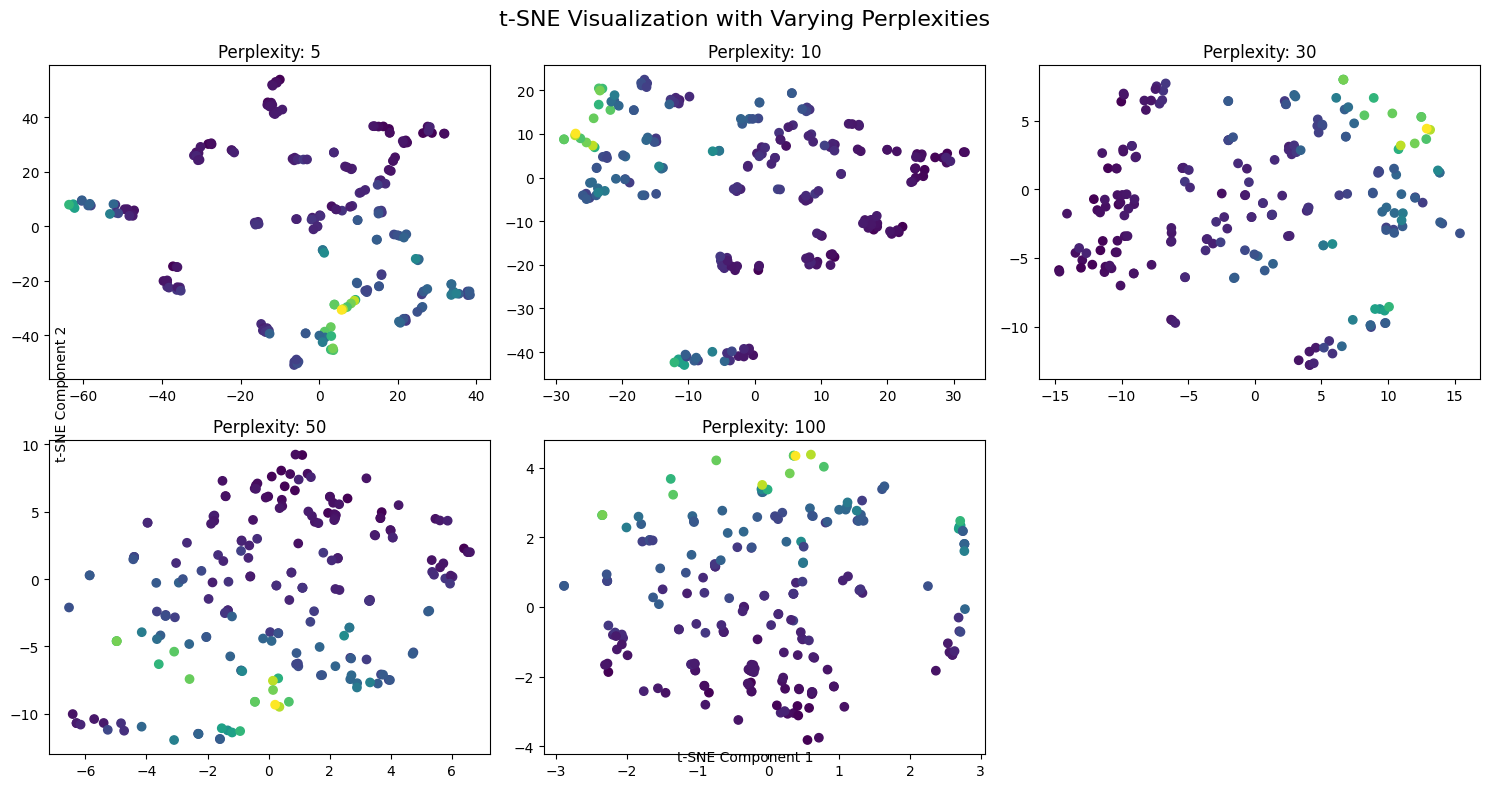

In [ ]:


import matplotlib.pyplot as plt
# Experiment with different perplexity values
perplexities = [5, 10, 30, 50, 100]

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Iterate over perplexities and plot
for i, perplexity in enumerate(perplexities):
  TSNE_model = TSNE(n_components=2, perplexity=perplexity, random_state=42)
  TSNE_transformed_data = TSNE_model.fit_transform(X_normalised)

  axes[i].scatter(TSNE_transformed_data[:, 0], TSNE_transformed_data[:, 1], c=y, cmap='viridis')
  axes[i].set_title(f'Perplexity: {perplexity}')

# Hide the last subplot (since we only have 5 perplexities)
axes[-1].axis('off')

# Set common labels
fig.suptitle('t-SNE Visualization with Varying Perplexities', fontsize=16)
fig.text(0.5, 0.04, 't-SNE Component 1', ha='center')
fig.text(0.04, 0.5, 't-SNE Component 2', va='center', rotation='vertical')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


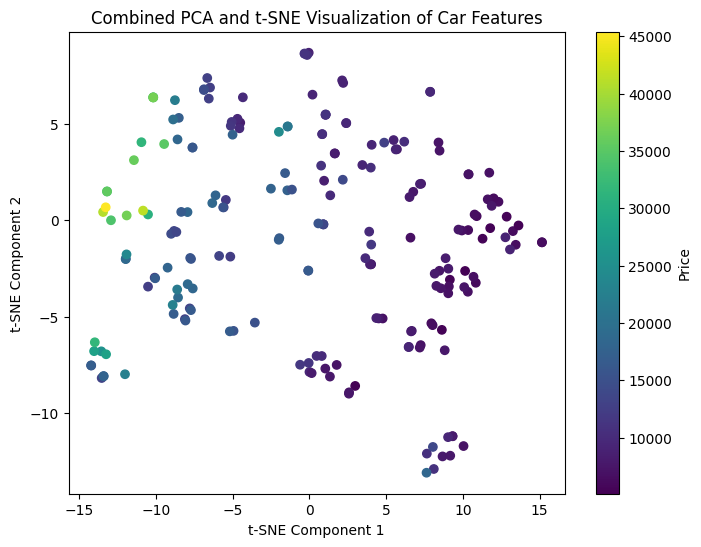

In [ ]:
# combine PCA and t-SNE

import matplotlib.pyplot as plt
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=10)  # Reduce to 10 components
X_pca = pca.fit_transform(X_normalised)

# Apply t-SNE on the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plot the combined PCA and t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('Combined PCA and t-SNE Visualization of Car Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Price')
plt.show()


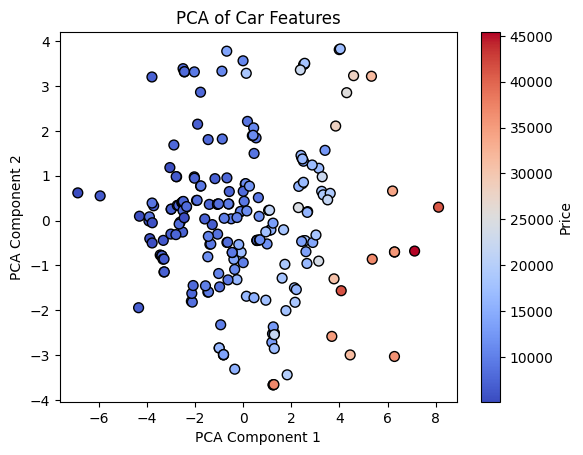

In [ ]:
# visualise the PCA result above with colorbar reflecting y

import matplotlib.pyplot as plt
# Plot the PCA data
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=50, edgecolor='k')

# Set the title and labels
plt.title('PCA of Car Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a color bar with the correct mapping
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Show the plot
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

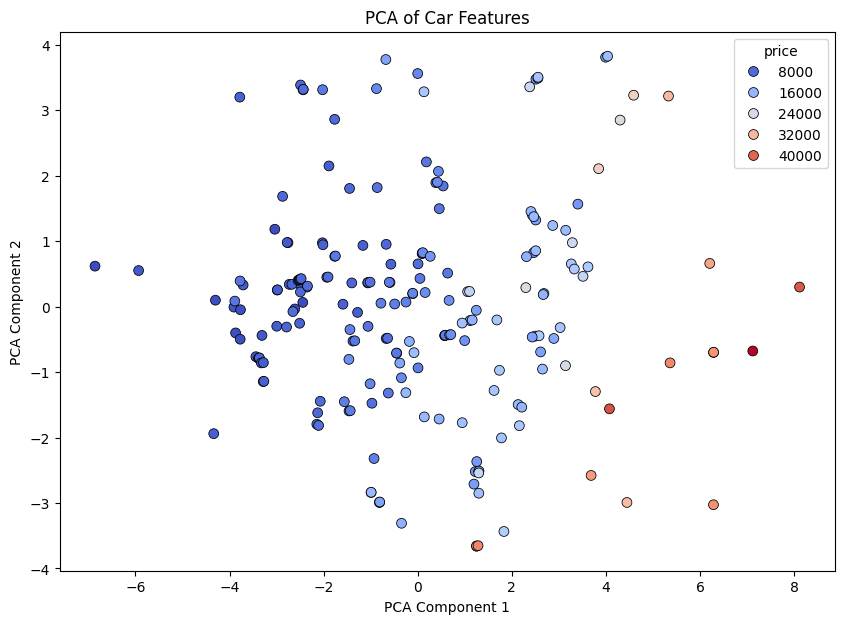

In [ ]:
# Visualize PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', s=50, edgecolor='k')
plt.title('PCA of Car Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
#plt.colorbar(label='Price')
#plt.colorbar(plt.cm.ScalarMappable(mappable=None, cax=None, ax=None, label='Price'))
plt.colorbar(mappable=None, cax=None, ax=None, lavel='Price')
plt.show()


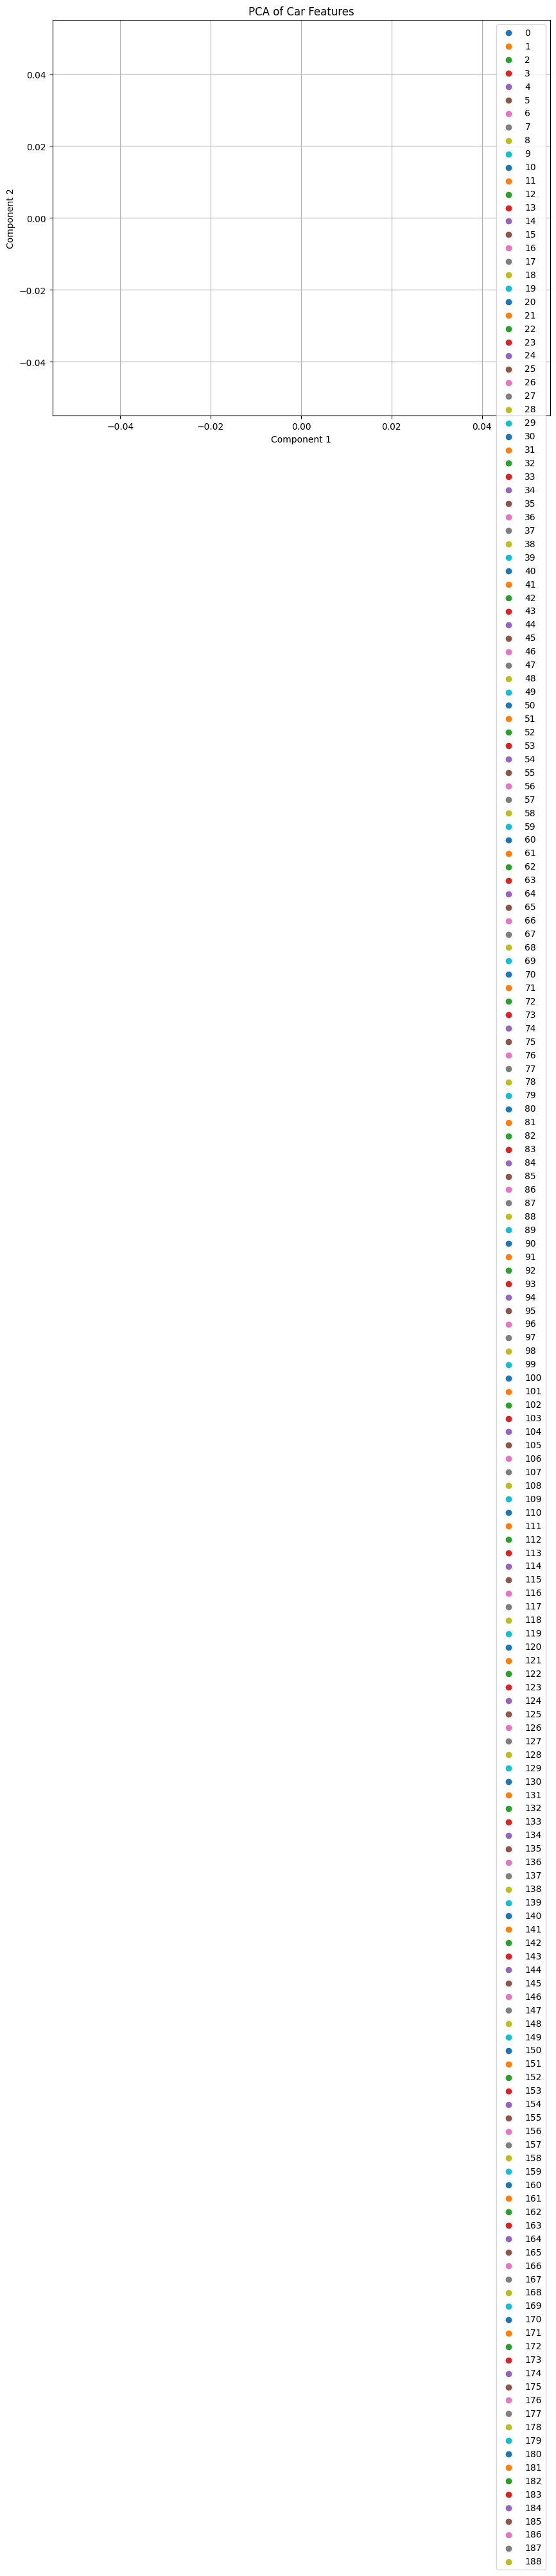

In [ ]:
# Visualise the reduced data in 2D.
def plot_embedding(X, title, y):
    plt.figure(figsize=(10, 8))
    for i in range(len(np.unique(y))):
        plt.scatter(X[y == i, 0],
                    X[y == i, 1],
                    label=str(i))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding(X_pca, "PCA of Car Features", y)